# Plotting and Data Visualization

```{admonition} Overview
:class: overview

Questions:

* How do I visualize data by making graphs?

Objectives:

* Plot data from a 'pandas dataframe'.

* Label and customize graph.

* Save figures to files.

* Plot multiple graphs on one figure.

* Create multiple figures using a 'for' loop
```

Plotting is one of the most effective methods of representing numerical data and illustrating their patterns and trends.  There are a number of applications that facilitate graph creation (Excel, Origin, SciDavis, etc.), but these methods can be time consuming, tedious, and at times inflexible.  We have already seen the potential of coding for reading/editing/saving multiple files at once, as well as in creating tables from raw data in a 'CSV' file.  Taking what we have learned so far, we will focus in this module on creating plots from the data in the previous lesson, customizing the plots with color, design, labels and legends, and using loops to create multiple figures at once.

### Prepare data for plotting

First, we need to import pandas and load our data into variables.  These lines should look familiar from the previous lesson.


In [1]:
import pandas as pd

distance_file = "data/distance_data_headers.csv"

distances = pd.read_csv(distance_file)

distances

,Frame,THR4_ATP,THR4_ASP,TYR6_ATP,TYR6_ASP
0,1,8.9542,5.8024,11.5478,9.9557
1,2,8.6181,6.0942,13.9594,11.6945
2,3,9.0066,6.0637,13.0924,11.3043
3,4,9.2002,6.0227,14.5282,10.1763
4,5,9.1294,5.9365,13.5321,10.6279
...,...,...,...,...,...
9995,9996,8.5083,7.7587,9.1789,10.6715
9996,9997,8.9524,7.4681,9.5132,10.9945
9997,9998,8.6625,7.7306,9.5469,10.3063
9998,9999,9.2456,7.8886,9.8151,10.7564


## Plotting Data

A data set is plotted using the 'plot()' function.  Note the position of the x-axis (not 0) and the lack of labels.

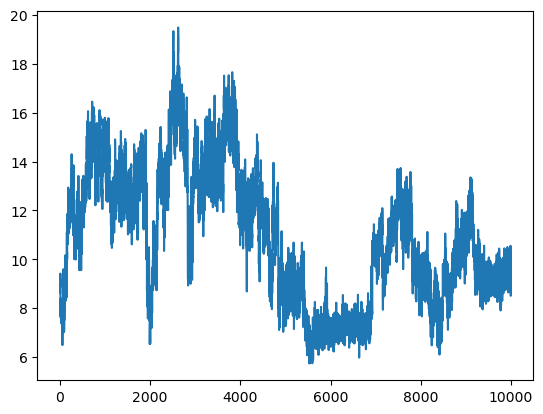

In [2]:
test = distances["THR4_ATP"].plot()

``````{admonition} Check Your Understanding
:class: exercise

How would you get make the same plot using the iloc command? 

````{admonition} Solution
:class: solution dropdown

```python
# THR4_ATP is the second column, and we want all rows
distances.iloc[:,1].plot()
```
````
``````

### Plotting with x and y

The data here are relatively straightforward, with the Frame column serving as a simple x value for the rest of the columns.  Often however, it is necessary to show trends or patterns in data in relation to a variety of independent variables.  If you have data that contains multiple x columns, it can be helpful to use the 'x' and 'y' keywords of the 'plot()' function.  Note that doing so also causes the x-axis label to be added automatically.

<AxesSubplot: xlabel='Frame'>

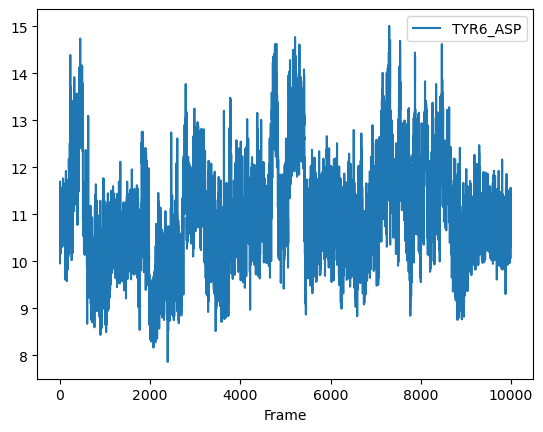

In [3]:
distances.plot(x="Frame", y="TYR6_ASP")

### Labels and Legends

Adding labels and legends is as simple as passing parameters to the 'plot()' function.

```{admonition} Saving precious keystrokes
:class: tip

The data labels in our set are all caps mixed with numbers and an underscore.  They are going to be cumbersome to reference, so we'll assign them to a variable for later before moving on.
```

In [4]:
top = distances.columns    # Creates a list of column headers
for i in top:    # loop through headers and print them one by one
    print(i)

Frame
THR4_ATP
THR4_ASP
TYR6_ATP
TYR6_ASP


<AxesSubplot: title={'center': 'Looks legit now, right?'}, xlabel='Something other than Frame', ylabel='Distance (Å)'>

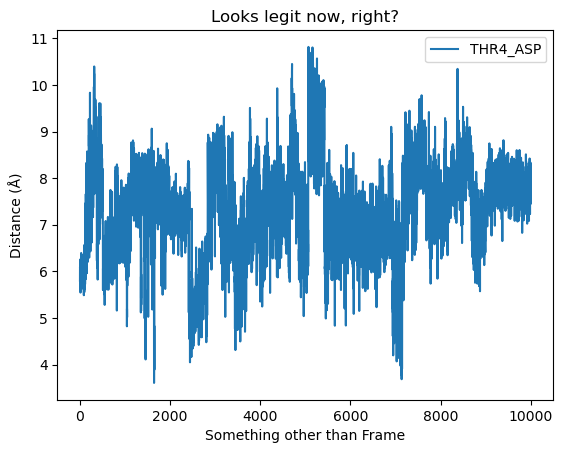

In [5]:
distances.plot(
    x=top[0],    # Now we can reference the columns with our new list of headers
    y=top[2], 
    xlabel=f"Something other than {top[0]}", 
    ylabel="Distance (\u212B)",   # Gettin' fancy with unicode characters
    title="Looks legit now, right?",
    legend=True    # This is default when x and y keywords are used, but the keyword is useful to know
)

### Different Types of Charts

The default plot type in pandas is the line graph, however there are a variety of available plot types that can be specified using the 'kind' keyword.  The example below is a bar graph of the first frame of our data.  For more chart types and styles, check out the [visualization documentation](https://pandas.pydata.org/docs/user_guide/visualization.html)

<AxesSubplot: >

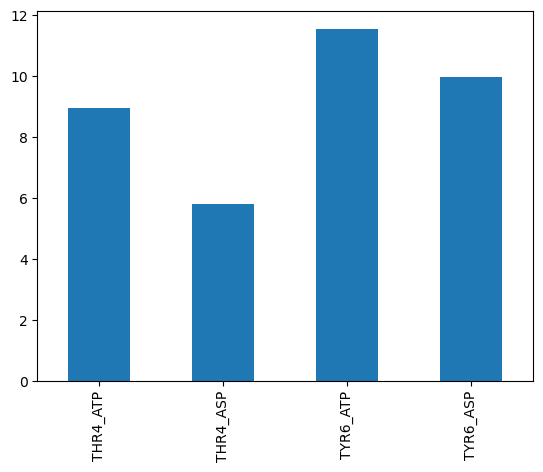

In [6]:
distances.iloc[0,1:].plot(kind='bar')

```{admonition} Methods vs. Keywords
:class: tip

Different plot types can also be accessed using a method rather than a keyword, allowing for keyword modification within the method.  See the following examples:
```

<AxesSubplot: >

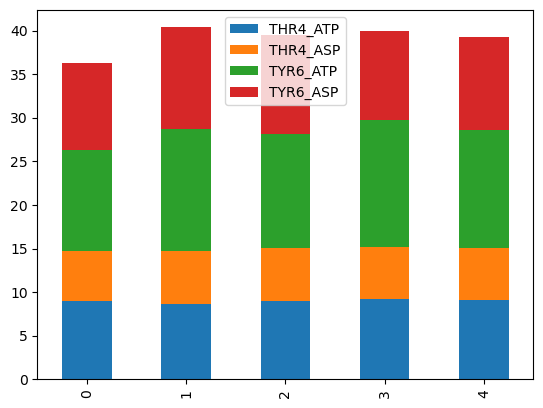

In [7]:
distances.iloc[0:5,1:].plot.bar(stacked=True)

<AxesSubplot: title={'center': 'Scatter Plot'}, ylabel='Distance (Å)'>

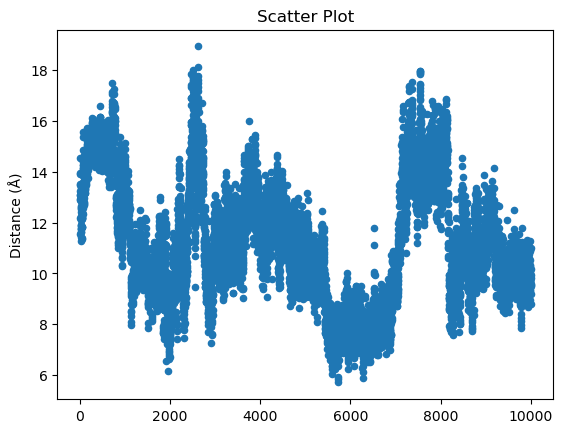

In [8]:
# x and y keywords are required for a scatter plot
distances.plot.scatter(
    x="Frame", 
    y=top[3],
    ylabel="Distance (\u212B)",
    xlabel="",
    title="Scatter Plot",
    legend=True    # Note this doesn't work. Haven't figured out why yet
)

### Customizing Appearance and Changing Resolution

Now you are familiar with passing keywords/parameters to the plot function.  Additional keywords allow further customization and refinement.  For a complete list, see the [DataFrame.plot API](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html)

<AxesSubplot: >

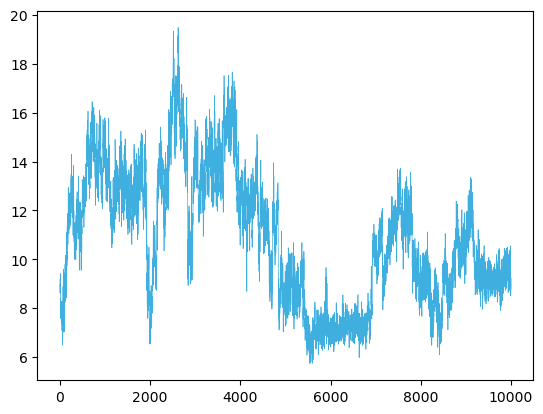

In [9]:
distances["THR4_ATP"].plot(color='#3FAFDF', lw=0.5)    # Wrap the plot in a variable

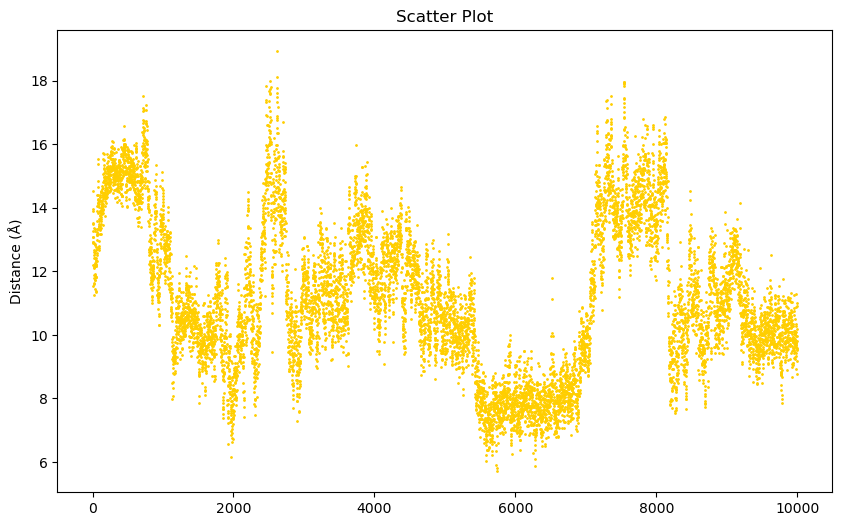

In [10]:
# Now we'll touch up the scatter plot from above before saving it.
scat = distances.plot.scatter(    # assigning to a variable makes it easier to save
    x="Frame", 
    y=top[3],
    ylabel="Distance (\u212B)",
    xlabel="",
    title="Scatter Plot",
    c="#FFCE00",    # 
    s=1,    # point size
    figsize=(10,6)
)

### Saving the Figure and Setting the Resolution

Pandas does not have a function to save generated figures.  This is because it does not stand alone, but relies on other math/graphing packages as backends.  On one hand, this allows for the flexibility to pass and reformat data from numpy format to matplotlib format (for example), however additional packages must be imported for some functionality.

So first we need to import the pyplot module from matplotlib:

In [11]:
import matplotlib.pyplot as plt

Now we can save our figure variable to a file, and set the images resolution while we do.

In [12]:
fig = scat.get_figure()
fig.savefig('data/foo.png', dpi=300)

## Plotting More Than One Set of Data

### Multiple Sets On a Single Plot

Adding additional data sets to the same plot can be done simpy by using a series of plot commands.

<AxesSubplot: xlabel='B'>

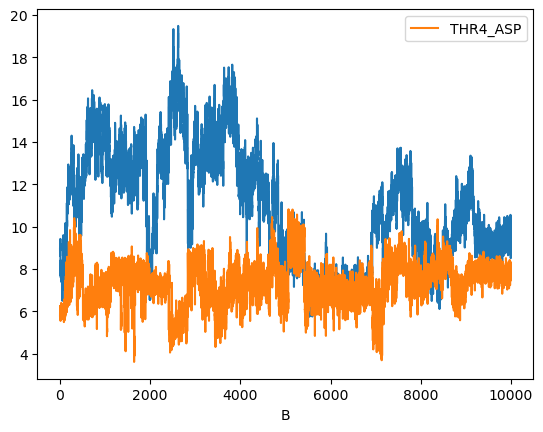

In [13]:
distances["THR4_ATP"].plot(xlabel="A", legend=False)
distances["THR4_ASP"].plot(xlabel="B", legend=True)

This can cause a variety of problems however, particularly when using keywords, as shown above.  If a range of columns are given instead, only one set of keywords is needed, and the legend is included by default.

<AxesSubplot: >

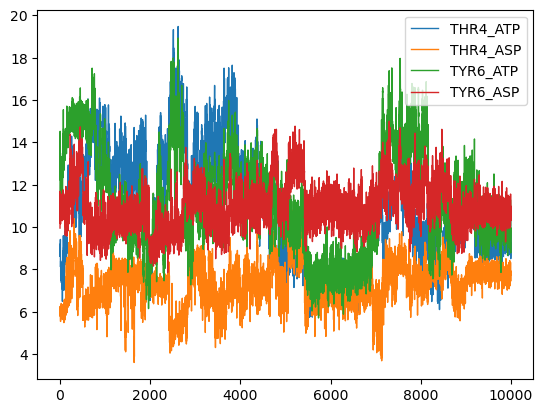

In [14]:
distances.iloc[:,1:].plot(lw=1)

### Multiple Subplots in One Figure

A figure composed of subplots can be created by setting the boolean parameter 'subplots' to true in the plot command.

array([[<AxesSubplot: >, <AxesSubplot: >],
       [<AxesSubplot: >, <AxesSubplot: >]], dtype=object)

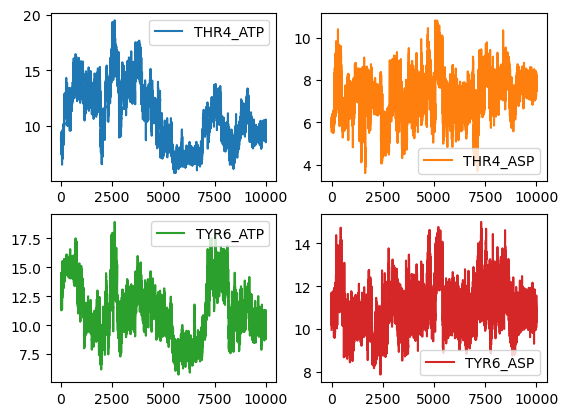

In [15]:
distances.iloc[:,1:].plot(subplots=True, layout=(2,2), sharex=False)

### Multiple Figures Using Loops

Suppose instead in our reporting we wanted to discuss each plot in turn.  As long as the settings are consistent, we can generate, modify, and save a series of figures with a single block of code!

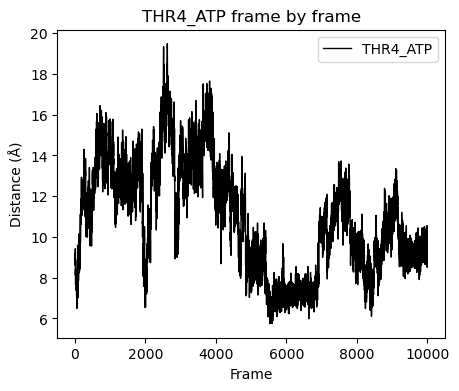

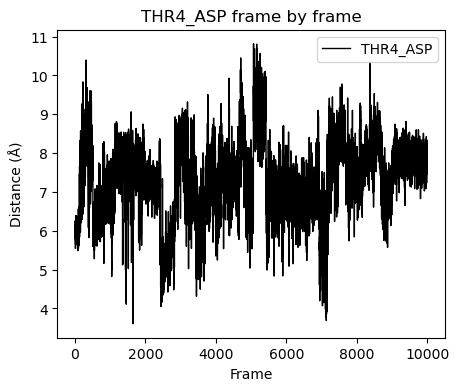

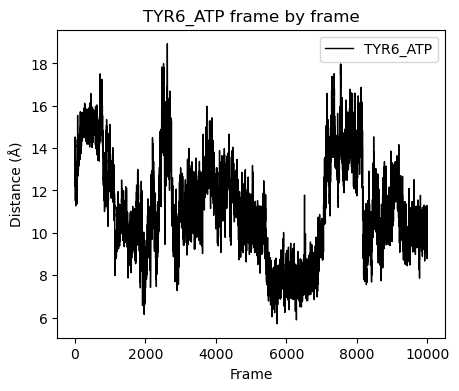

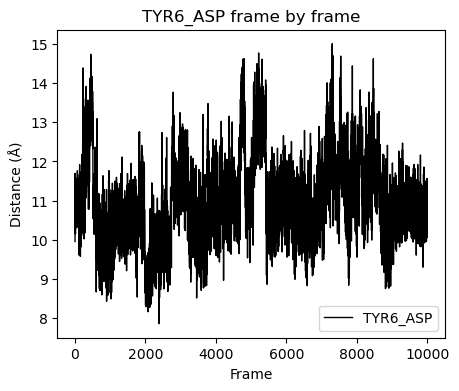

In [16]:
# loop through the list of headers, creating a new figure with each cycle
for col in top[1:]:
    fname = f"{col}.png"
    graph = distances.plot(
        x=top[0],
        y=col,
        lw=1,
        xlabel=top[0],
        ylabel="Distance (\u212B)",
        color="#000000",
        title=f"{col} frame by frame",
        figsize=(5,4)
    )
    fig = graph.get_figure()
    fig.savefig(fname, dpi=300)

``````{admonition} Challenge time!
:class: exercise

In our data reporting, it has been decided that we need to take each of the plots and overlay an average of all the samples for comparison.  We'll need to create a column of the average distances between the 4 existing columns and graph that in gold (#FFCE00) on top of the plot in black.  This will be too busy though, so we only want to graph one point for every hundred. Don't have a lot of time either, so best use a for loop.

````{admonition} Solution
:class: solution dropdown

```python
# 1 - add the averages column
distances['mean'] = distances.mean(axis=1)

```
````
``````

``````{admonition} Key Points
:class: key

* Use pandas to generate figures from tabular data with the 'plot()' function

* Create a variety of chart types with either the 'kind' keyword or the chart method

* Add labels, legends, color, and other stylistic choices to figures by passing parameters to plot

* Work with multiple data sets, either with the 'iloc[]' syntax, 'for' loops, or simple overlay

* Use the matplotlib.pyplot functions 'get_figure()' and 'savefig()' to save the figure to a file

``````